In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nengo
from nengo import spa
%matplotlib inline

**Good tests**
```
THREE+THREE=SIX
THREE+FIVE=EIGHT
FIVE+THREE=EIGHT
```

**Fail tests**
```
FOUR+FOUR=EIGHT
ONE+FOUR=FIVE
TWO+FOUR=SIX
FOUR+ONE=FIVE
FOUR+TWO=SIX|
```

In [1]:
column_labels = ["3+3", "3+5", "5+3", "4+4", "1+4", "2+4", "4+1", "4+2"]

In [266]:
#np.load("data/paperslow_count_data.npz")
af = np.load("data/multpred2_learning_data.npz")
vo_load = np.load("data/multpred2_learning_vocab.npz")
print(af.keys())
print(vo_load.keys())

['p_recall', 'p_keys', 'p_error', 'p_values']
['keys', 'vecs']


In [267]:
vo = spa.Vocabulary(10)
for key, val in zip(vo_load['keys'], vo_load['vecs']):
    vo.add(key, val)

In [268]:
recall = af['p_recall']
print(recall.shape)

(25, 600, 10)


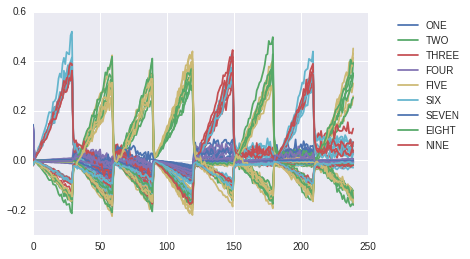

In [147]:
for r_i in range(run_num):
    plt.plot(spa.similarity(recall[r_i][360:], vo))
plt.legend(vo.keys, bbox_to_anchor=(1.3,1))

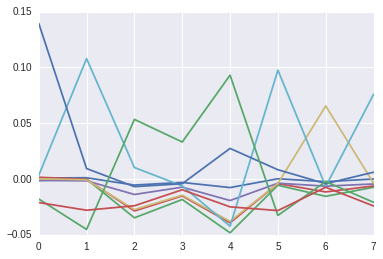

In [148]:
tmp = spa.similarity(recall[0][s_win:], vo)
plt.plot(tmp[::30])

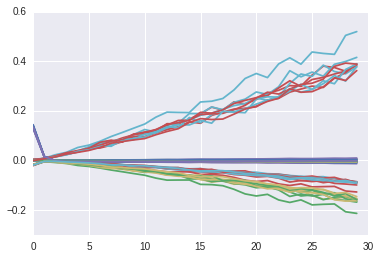

In [149]:
for r_i in range(run_num):
    simi = spa.similarity(recall[r_i][s_win:], vo)
    resimi = simi.reshape((trial_num, step, dims))
    plt.plot(resimi[0])

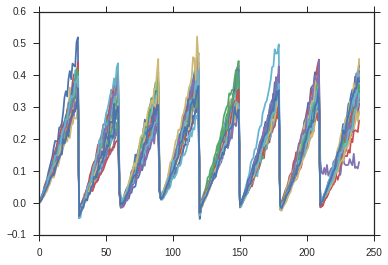

In [271]:
run_num = 25
trial_num = 8
dims = 9
step = 30
max_res = np.zeros((run_num, trial_num))

for r_i in range(run_num):
    simi = spa.similarity(recall[r_i][s_win:], vo).reshape((trial_num, step, dims))
    max_dim = np.argmax(np.sum(simi, axis=1), axis=1)
    
    sing_dim = np.zeros((trial_num, step))
    for t_i in range(trial_num):
        sing_dim[t_i] = simi[t_i, :, max_dim[t_i]]
    
    plt.plot(sing_dim.flatten())
    max_res[r_i] = np.max(sing_dim, axis=1)

In [272]:
print(max_res.shape)
learn_res = pd.DataFrame(max_res, columns=column_labels)

(25, 8)


(25, 8)


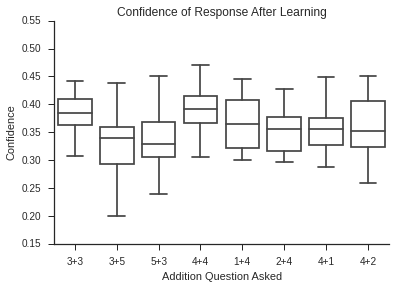

In [273]:
sns.set_style("ticks")
ax = sns.boxplot(data=learn_res, fliersize=0)
ax.set_xticklabels(column_labels, rotation=0)

# set the face colour to white
for art in ax.artists:
    art.set_facecolor('white')

ax.set_title("Confidence of Response After Learning")
ax.set_ylabel("Confidence")
ax.set_xlabel("Addition Question Asked")
sns.despine()
fig = ax.get_figure()
fig.savefig("pred_plot.pdf", format="pdf")
print(max_res.shape)

(25, 8)


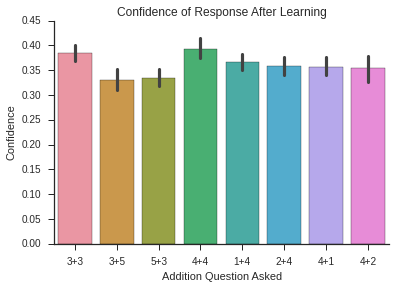

In [274]:
sns.set_style("ticks")
ax = sns.barplot(data=learn_res)
ax.set_xticklabels(column_labels, rotation=0)

# set the face colour to white
for art in ax.artists:
    art.set_facecolor('white')

ax.set_title("Confidence of Response After Learning")
ax.set_ylabel("Confidence")
ax.set_xlabel("Addition Question Asked")
sns.despine()
fig = ax.get_figure()
fig.savefig("pred_plot.pdf", format="pdf")
print(max_res.shape)

(10, 8)


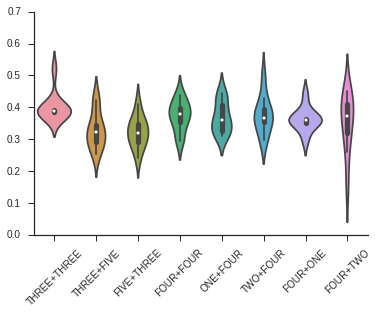

In [177]:
sns.set_style("ticks")
ax = sns.violinplot(data=learn_res)
ax.set_xticklabels(column_labels, rotation=45)
sns.despine()
print(max_res.shape)

In [275]:
learn_res

,3+3,3+5,5+3,4+4,1+4,2+4,4+1,4+2
0,0.519323,0.347740,0.239527,0.386829,0.431596,0.377289,0.439331,0.310796
1,0.386002,0.252446,0.343809,0.359635,0.445213,0.354772,0.389705,0.351892
2,0.384068,0.339392,0.285273,0.293727,0.334985,0.362910,0.295018,0.258724
3,0.389567,0.423797,0.282362,0.398274,0.320889,0.370458,0.364410,0.154074
4,0.415418,0.326275,0.350279,0.353588,0.374054,0.295977,0.330855,0.451523
5,0.384065,0.273930,0.363732,0.439740,0.310827,0.497291,0.364385,0.343587
6,0.388984,0.291700,0.410829,0.305565,0.367946,0.402008,0.358632,0.431243
7,0.392319,0.292470,0.328783,0.394851,0.353445,0.355864,0.363246,0.395786
8,0.378189,0.417914,0.302945,0.368091,0.318882,0.301350,0.350718,0.413608
9,0.362164,0.317293,0.313016,0.424280,0.418184,0.428180,0.354985,0.406544


In [278]:
new_add = pd.concat((learn_res["3+3"], learn_res["4+4"])).reset_index()
one_fam = pd.concat((learn_res["3+5"], learn_res["5+3"], learn_res["1+4"], learn_res["2+4"], learn_res["4+1"], learn_res["4+2"])).reset_index()

In [279]:
na1 = pd.Series(new_add[0], name="Confidence")
na2 = pd.Series(np.zeros(len(new_add), dtype=np.int8), name="Familiarity")
aa = pd.concat((na1, na2), axis=1)

In [280]:
of1 = pd.Series(one_fam[0], name="Confidence")
of2 = pd.Series(np.ones(len(one_fam[0]), dtype=np.int8), name="Familiarity")
bb = pd.concat((of1, of2), axis=1)

In [281]:
pair_res = pd.concat((aa, bb))

(25, 8)


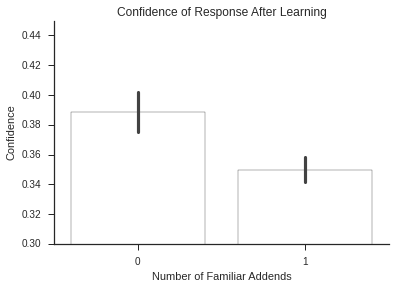

In [284]:
sns.set_style("ticks")
ax = sns.barplot(x="Familiarity", y="Confidence", data=pair_res, color="white")

ax.set_title("Confidence of Response After Learning")
ax.set_ylabel("Confidence")
ax.set_xlabel("Number of Familiar Addends")
ax.set_ylim(0.3, 0.45)
sns.despine()
fig = ax.get_figure()
fig.savefig("conf_bar_plot.pdf", format="pdf")
print(max_res.shape)

In [4]:
mr = pd.read_hdf("data/multpred2_09_38_51.h5")

In [17]:
no_fam = (mr['key'] == "3+3") | (mr['key'] == "4+4")
mr.loc[no_fam, "fam"] = 0
one_fam = (mr["key"] == "3+5") | (mr["key"] == "5+3") | (mr["key"] == "1+4") | (mr["key"] == "2+4") | (mr["key"] == "4+1") | (mr["key"] == "4+2")
mr.loc[one_fam, "fam"] = 1
mr['fam'] = mr['fam'].astype(np.int8)

In [12]:
print(mr.columns)

Index([u'key', u'val', u'error', u'confidence', u'fam'], dtype='object')


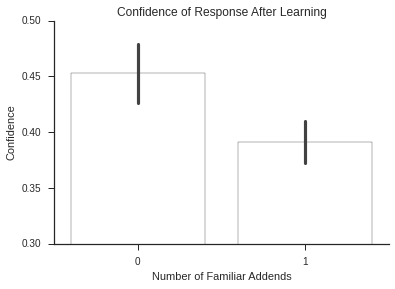

In [18]:
sns.set_style("ticks")
ax = sns.barplot(x="fam", y="confidence", data=mr, color="white")

ax.set_title("Confidence of Response After Learning")
ax.set_ylabel("Confidence")
ax.set_xlabel("Number of Familiar Addends")
ax.set_ylim(0.3, 0.5)
sns.despine()
fig = ax.get_figure()
fig.savefig("conf_bar_plot.pdf", format="pdf")

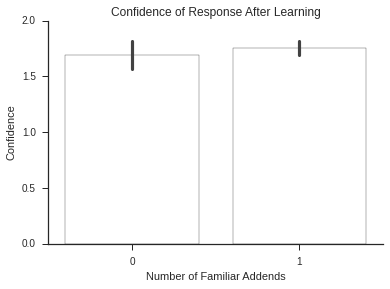

In [21]:
sns.set_style("ticks")
ax = sns.barplot(x="fam", y="error", data=mr, color="white")

ax.set_title("Confidence of Response After Learning")
ax.set_ylabel("Confidence")
ax.set_xlabel("Number of Familiar Addends")
#ax.set_ylim(0.3, 1)
sns.despine()